In [1]:
# importing essential libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
# exploratory data analysis

df = pd.read_csv ('downloads/Cust_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape


(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
print (df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


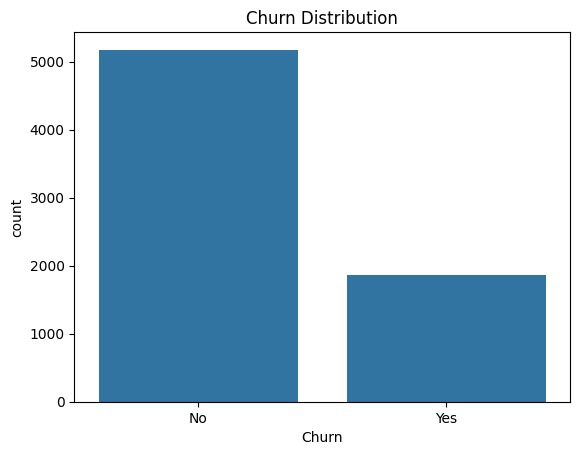

In [8]:
# plotting churn distribution graph

sns.countplot(x = 'Churn', data = df)
plt.title ('Churn Distribution')
plt.show ()

In [9]:
# making a list of categorial columns

ctg_cols = df.select_dtypes(include = ['object']).columns.tolist()
ctg_cols.remove ('customerID')
ctg_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
for col in ctg_cols:
    print (f'\n{col} Distribution: ')
    print (df[col].value_counts())


gender Distribution: 
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner Distribution: 
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents Distribution: 
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService Distribution: 
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines Distribution: 
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService Distribution: 
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity Distribution: 
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup Distribution: 
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection Distribution: 
DeviceProtection
No             

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

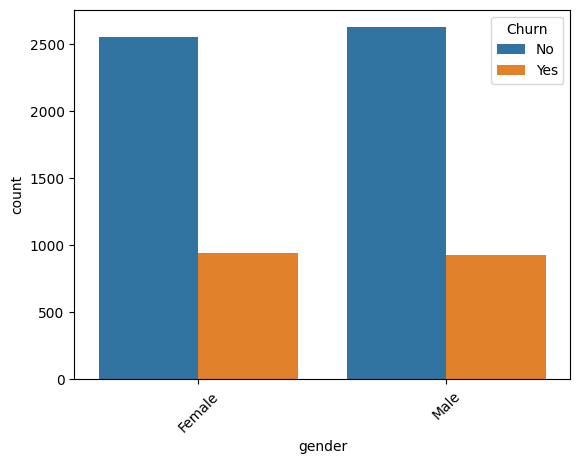

In [11]:
sns.countplot (x = 'gender', hue = 'Churn', data = df)
plt.xticks (rotation = 45)

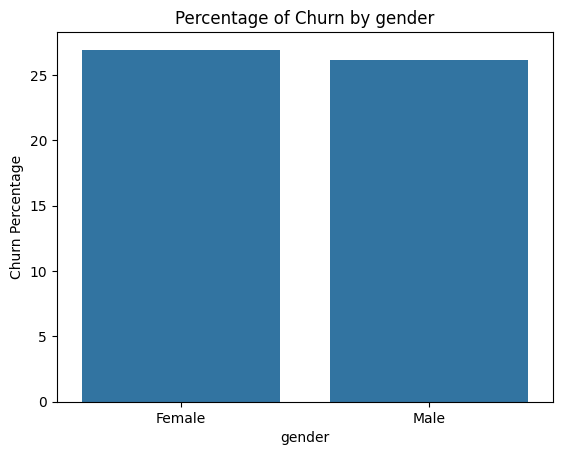

In [12]:
# plotting the graphs of different categorial columns against churn percentage

churn_percentage = df.groupby ('gender')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'gender', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by gender')
plt.savefig ('gender_vs_churn.png')
plt.show()

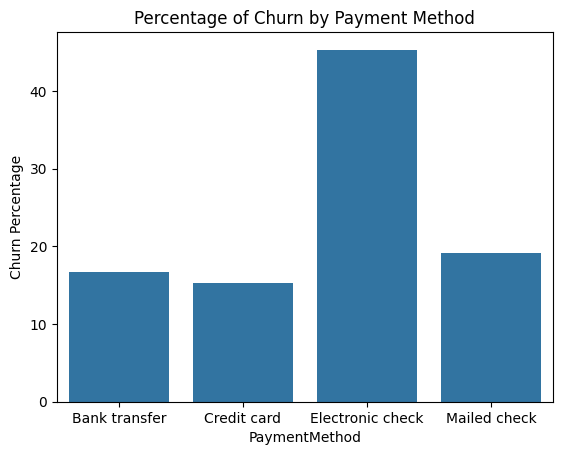

In [13]:
# (standardising the data in 'payment method' column)
df['PaymentMethod'] = df['PaymentMethod'].str.replace (r'\(.*\)', '', regex = True).str.strip()




churn_percentage = df.groupby ('PaymentMethod')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'PaymentMethod', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Payment Method')
plt.savefig ('paymentmethod_vs_churn.png')
plt.show()

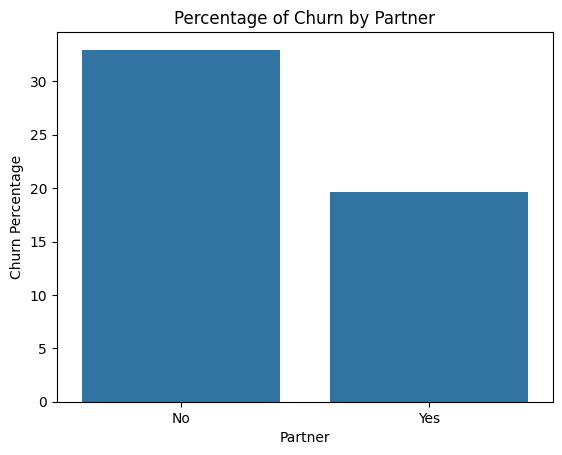

In [14]:
churn_percentage = df.groupby ('Partner')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'Partner', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Partner')
plt.show()

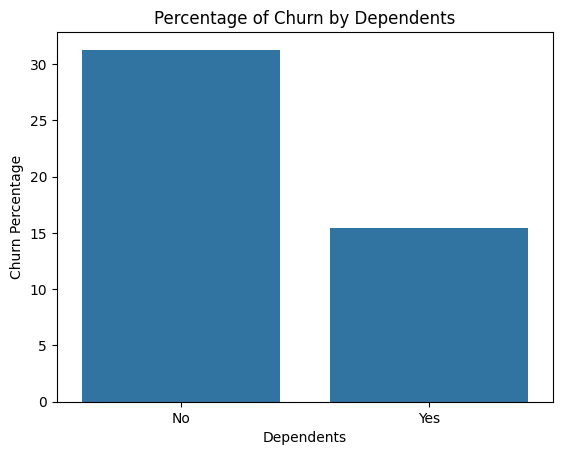

In [15]:
churn_percentage = df.groupby ('Dependents')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'Dependents', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Dependents')
plt.show()

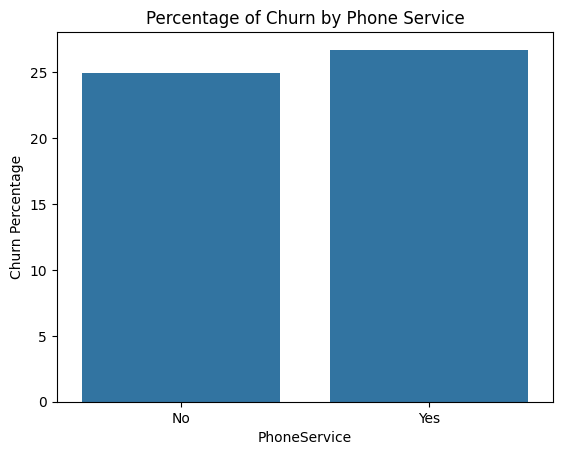

In [16]:
churn_percentage = df.groupby ('PhoneService')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'PhoneService', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Phone Service')
plt.show()

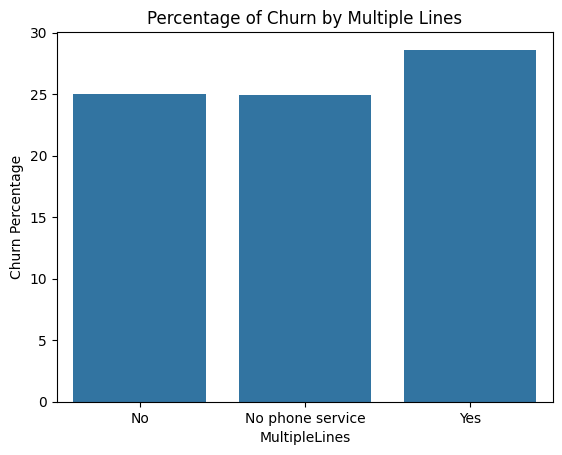

In [17]:
churn_percentage = df.groupby ('MultipleLines')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'MultipleLines', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Multiple Lines')
plt.show()

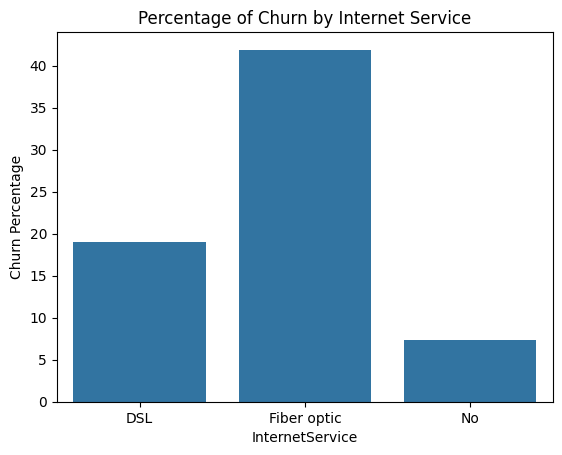

In [18]:
churn_percentage = df.groupby ('InternetService')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'InternetService', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Internet Service')
plt.savefig ('internetservice_vs_churn.png')
plt.show()

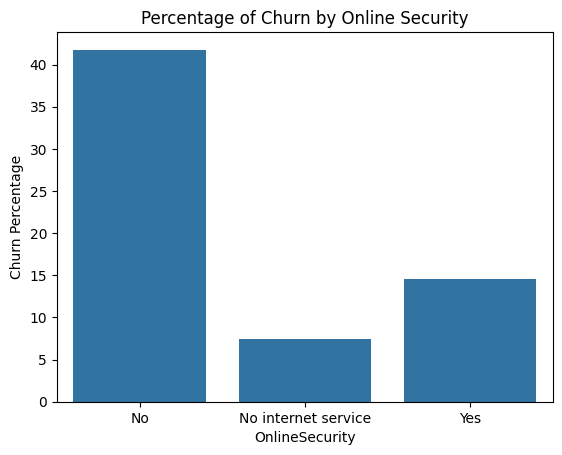

In [19]:
churn_percentage = df.groupby ('OnlineSecurity')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'OnlineSecurity', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Online Security')
plt.show()

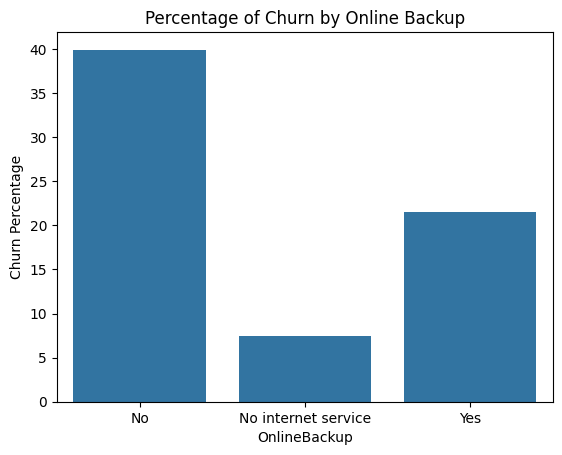

In [20]:
churn_percentage = df.groupby ('OnlineBackup')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'OnlineBackup', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Online Backup')
plt.show()

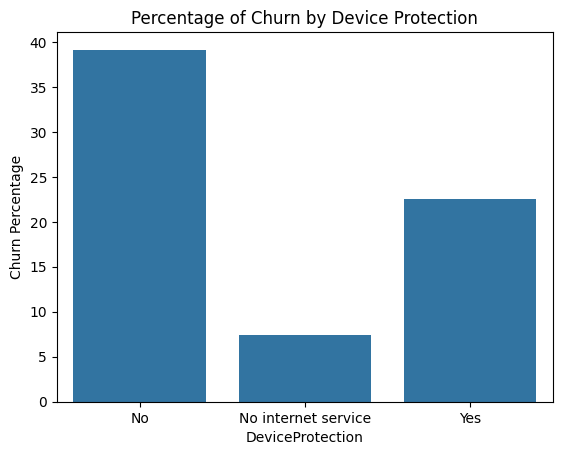

In [21]:
churn_percentage = df.groupby ('DeviceProtection')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'DeviceProtection', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Device Protection')
plt.show()

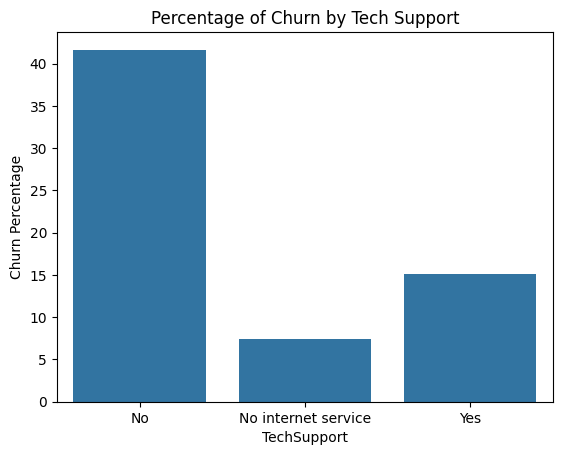

In [22]:
churn_percentage = df.groupby ('TechSupport')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'TechSupport', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Tech Support')
plt.show()

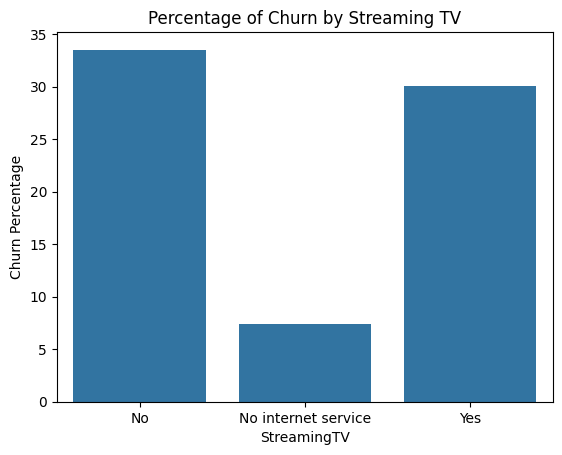

In [23]:
churn_percentage = df.groupby ('StreamingTV')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'StreamingTV', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Streaming TV')
plt.show()

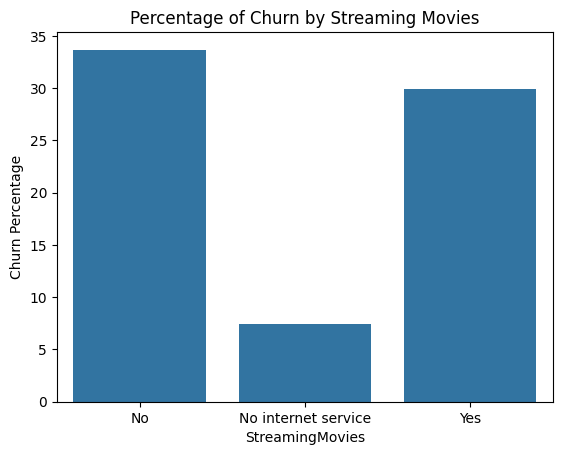

In [24]:
churn_percentage = df.groupby ('StreamingMovies')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'StreamingMovies', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Streaming Movies')
plt.show()

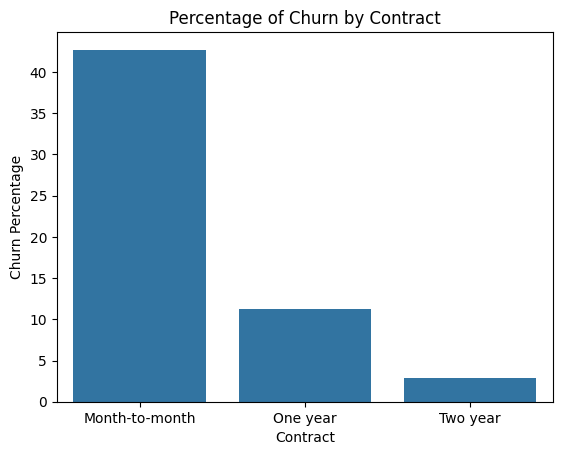

In [25]:
churn_percentage = df.groupby ('Contract')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'Contract', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Contract')
plt.show()

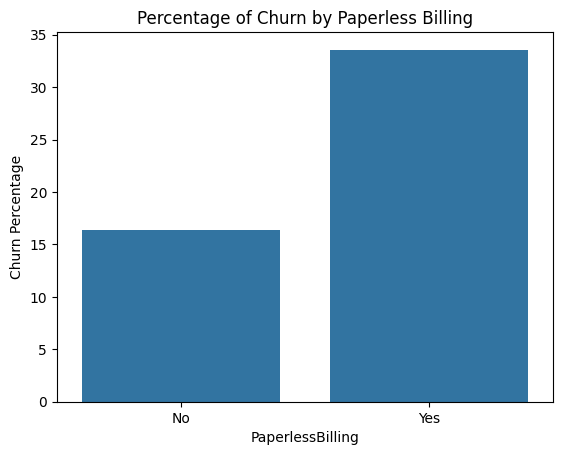

In [26]:
churn_percentage = df.groupby ('PaperlessBilling')['Churn'].value_counts(normalize = True).mul(100).rename('Churn Percentage').reset_index()
churn_percentage = churn_percentage [churn_percentage ['Churn'] == 'Yes']
sns.barplot (x = 'PaperlessBilling', y = 'Churn Percentage', data = churn_percentage)
plt.title ('Percentage of Churn by Paperless Billing')
plt.show()

In [27]:
# cleaning the data and standardising the data types.

print (df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [28]:
df['TotalCharges'] = pd.to_numeric (df['TotalCharges'], errors = 'coerce')
print (df['TotalCharges'].isnull().sum())

11


In [29]:
df.dropna (subset = ['TotalCharges'], inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [31]:
df.shape

(7032, 21)

In [32]:
# getting the insights on numerical columns.

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    print (f'\n{col} \nSummary Statistics: ')
    print (df[col].describe())


tenure 
Summary Statistics: 
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

MonthlyCharges 
Summary Statistics: 
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

TotalCharges 
Summary Statistics: 
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


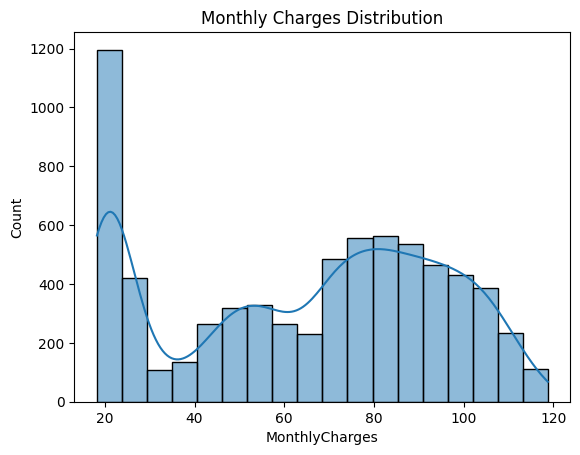

In [33]:
# plotting a histogram of monthly charges distribution

sns.histplot (df['MonthlyCharges'], kde = True)
plt.title ('Monthly Charges Distribution')
plt.show()

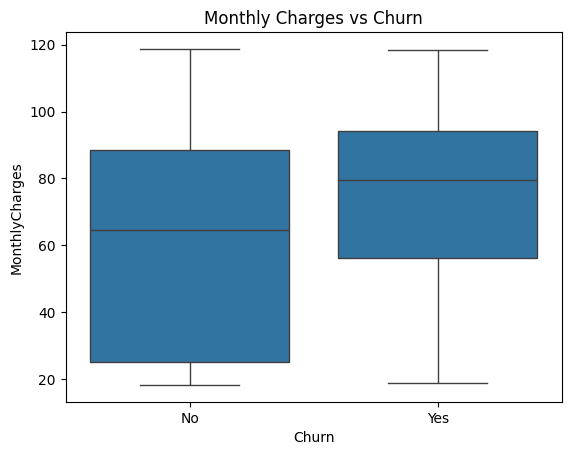

In [34]:
# plotting a box plot of 'monthly charges' and 'tenure' against churn.

sns.boxplot (x = 'Churn', y = 'MonthlyCharges', data = df)
plt.title ('Monthly Charges vs Churn')
plt.show()

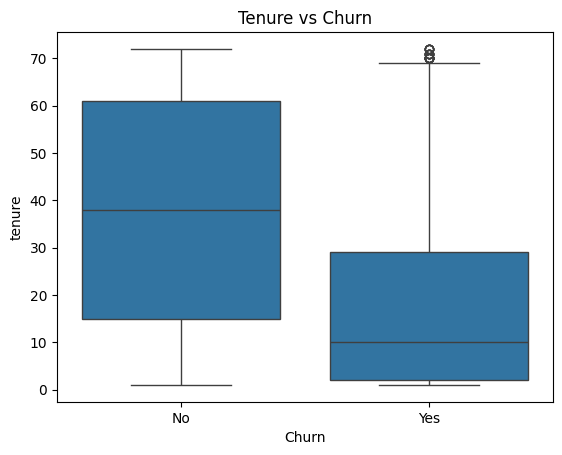

In [35]:
sns.boxplot (x = 'Churn', y = 'tenure', data = df)
plt.title ('Tenure vs Churn')
plt.show()

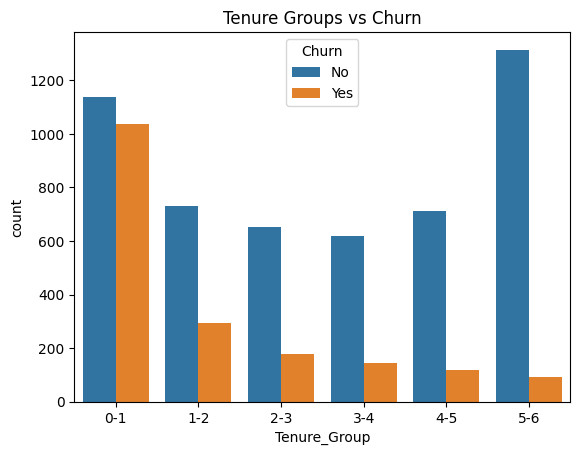

In [36]:
# creating a 'tenure group' column and plotting it against churn.

df ['Tenure_Group'] = pd.cut (df['tenure'], bins = [0,12,24,36,48,60,72], labels  = ['0-1', '1-2', '2-3', '3-4', '4-5','5-6'])
sns.countplot (x = 'Tenure_Group', hue = 'Churn', data = df)
plt.title ('Tenure Groups vs Churn')
plt.show()

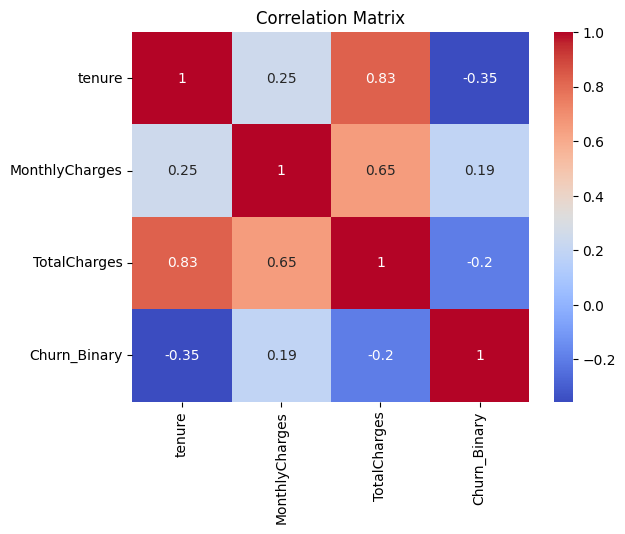

In [37]:
# made a correlation matrix to study correlation between numerical columns and churn.

df['Churn_Binary'] = df['Churn'].apply (lambda x: 1 if x == 'Yes' else 0)

corr_matrix = df[num_cols + ['Churn_Binary']].corr()
# print (corr_matrix)

sns.heatmap (corr_matrix, annot = True, cmap = 'coolwarm')
plt.title ('Correlation Matrix')
plt.show()

In [38]:
# filling null values (if any) in 'object' and 'numeric' data types with mode and median respectively.

df.isnull().sum()

for col in df.select_dtypes (include = ['object']).columns:
    df[col].fillna (df[col].mode()[0], inplace = True)

for col in df.select_dtypes (include = ['number']).columns:
    df[col].fillna (df[col].median(), inplace = True)
    

C:\Users\vijay\AppData\Local\Temp\ipykernel_7752\3509004340.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna (df[col].mode()[0], inplace = True)
C:\Users\vijay\AppData\Local\Temp\ipykernel_7752\3509004340.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [39]:
# encoding the binary category columns.

label_enc = LabelEncoder()

binary_ctg_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_ctg_cols:
    df[col] = label_enc.fit_transform (df[col])

In [40]:
# encoding the non binary columns using one hot encoding.

df = pd.get_dummies(df, columns = ['PaymentMethod', 'Contract', 'InternetService'], drop_first = True)

df.drop(columns = ['customerID'], inplace = True)
print (df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

         MultipleLines OnlineSecurity OnlineBackup DeviceProtection  ...  \
0     No phone service             

In [41]:
df = pd.get_dummies(df, columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first = True)

print (df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                    1           29.85     

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   gender                                7032 non-null   int32   
 1   SeniorCitizen                         7032 non-null   int64   
 2   Partner                               7032 non-null   int32   
 3   Dependents                            7032 non-null   int32   
 4   tenure                                7032 non-null   int64   
 5   PhoneService                          7032 non-null   int32   
 6   PaperlessBilling                      7032 non-null   int32   
 7   MonthlyCharges                        7032 non-null   float64 
 8   TotalCharges                          7032 non-null   float64 
 9   Churn                                 7032 non-null   int32   
 10  Tenure_Group                          7032 non-null   category
 11  Churn_Bin

In [43]:
print(df['MultipleLines_No phone service'].unique())

[ True False]


In [44]:
# standardising the numeric columns for modelling.

scaler = StandardScaler()

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [45]:
df.select_dtypes(include = ['object']).columns

Index([], dtype='object')

In [46]:
# rectified an error due to unfulfiled values.

for col in df.select_dtypes(include = ['float', 'int']).columns:
    non_num_value = df[col][pd.to_numeric(df[col], errors = 'coerce').isnull()]
    if not non_num_value.empty:
        print (f'column "{col}" has non num values: ')
        print (non_num_value.unique())

In [47]:
df = df.apply(pd.to_numeric, errors = 'coerce')
print(df.isnull().sum())

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Tenure_Group                            7032
Churn_Binary                               0
PaymentMethod_Credit card                  0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Contract_One year                          0
Contract_Two year                          0
InternetService_Fiber optic                0
InternetService_No                         0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [48]:
print (df.dtypes)

gender                                    int32
SeniorCitizen                             int64
Partner                                   int32
Dependents                                int32
tenure                                  float64
PhoneService                              int32
PaperlessBilling                          int32
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int32
Tenure_Group                            float64
Churn_Binary                              int64
PaymentMethod_Credit card                  bool
PaymentMethod_Electronic check             bool
PaymentMethod_Mailed check                 bool
Contract_One year                          bool
Contract_Two year                          bool
InternetService_Fiber optic                bool
InternetService_No                         bool
MultipleLines_No phone service             bool
MultipleLines_Yes                       

In [49]:
# splitting the data into test and training data.

X = df.drop(columns = ['TotalCharges', 'Churn', 'Churn_Binary'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
model.fit (X_train, y_train)

y_pred = model.predict (X_test)
print (y_pred)

[0 0 1 ... 0 0 0]


In [50]:
# printing the classification report and roc_auc scores.

print ('Confusion Matrix: ')
print (confusion_matrix(y_test, y_pred))

print ('\nClassification Report: ')
print (classification_report(y_test, y_pred))

print ('\n ROC_AUC score: ', roc_auc_score(y_test, model.predict_proba(X_test)[: , 1]))

Confusion Matrix: 
[[924 109]
 [201 173]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407


 ROC_AUC score:  0.8050988502414957


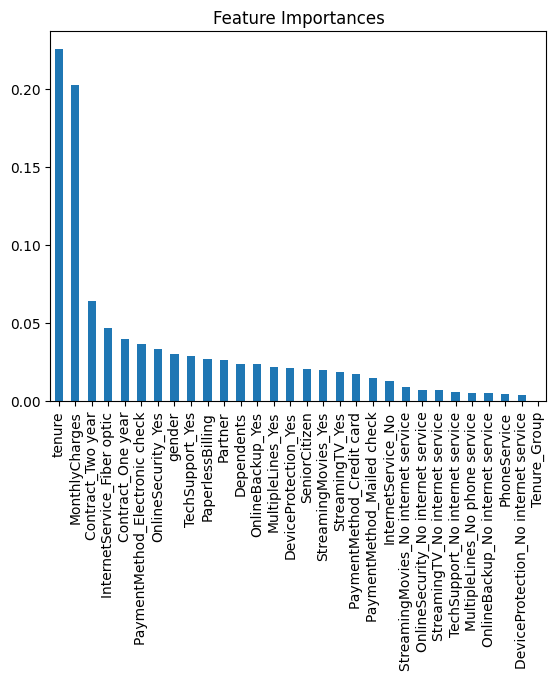

In [51]:
# printing the graph of feature importances.

feat_imp = pd.Series(model.feature_importances_, index = X_train.columns)
feat_imp.sort_values (ascending = False).plot(kind = 'bar')
plt.title ('Feature Importances')
plt.savefig('Feature_imp.png')
plt.show()

In [52]:
# finding the best parametres for training the model.

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_search = GridSearchCV (estimator = model, param_grid = param_grid, cv=5, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit (X_train, y_train)

print ('Best Parametres: ', grid_search.best_params_)
print ('\n Best Roc-Aoc Score: ', grid_search.best_score_)

best_model = grid_search.best_estimator_

Best Parametres:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

 Best Roc-Aoc Score:  0.8492808959647575


In [53]:
y_pred_tuned = best_model.predict (X_test)

print ('Confusion Matrix (tuned model): ')
print (confusion_matrix(y_test, y_pred_tuned))

print ('\nClassification Report (tuned model): ')
print (classification_report(y_test, y_pred_tuned))

print ('\n ROC_AUC score (tuned model): ', roc_auc_score(y_test, best_model.predict_proba(X_test)[: , 1]))

Confusion Matrix (tuned model): 
[[780 253]
 [ 97 277]]

Classification Report (tuned model): 
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407


 ROC_AUC score (tuned model):  0.8317539899881452


In [54]:
# dumping the model for building the app.

joblib.dump (best_model, 'churn_pred_model_tuned.pkl')
loaded_model = joblib.load ('churn_pred_model_tuned.pkl')